<a href="https://colab.research.google.com/github/lequangtruongK50/BTVN-AI/blob/main/Ngh%E1%BB%89_l%E1%BB%85_c%C3%B9ng_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
from PIL import Image
import numpy as np

# ƒê∆∞·ªùng d·∫´n th∆∞ m·ª•c ch·ª©a d·ªØ li·ªáu ƒë√£ chia
data_dir = r'/content/drive/MyDrive/BaÃÄi 3/dataset'
output_dir = r'/content/drive/MyDrive/BaÃÄi 3/dataset'  # Ghi ƒë√® l√™n th∆∞ m·ª•c g·ªëc sau khi resize

# K√≠ch th∆∞·ªõc m·ª•c ti√™u
IMG_SIZE = (640, 640)

# H√†m resize v√† chu·∫©n h√≥a h√¨nh ·∫£nh
def resize_and_normalize_image(image_path, output_path):
    # ƒê·ªçc h√¨nh ·∫£nh
    img = Image.open(image_path).convert('RGB')

    # Resize h√¨nh ·∫£nh
    img = img.resize(IMG_SIZE, Image.Resampling.LANCZOS)

    # Chuy·ªÉn th√†nh numpy array v√† chu·∫©n h√≥a
    img_array = np.array(img) / 255.0

    # Chuy·ªÉn l·∫°i th√†nh h√¨nh ·∫£nh v√† l∆∞u
    img_normalized = Image.fromarray((img_array * 255).astype(np.uint8))
    img_normalized.save(output_path)

# Duy·ªát qua t·∫•t c·∫£ c√°c th∆∞ m·ª•c (train, val) v√† c√°c l·ªõp (dat_yeu_cau, khong_dat_yeu_cau)
for split in ['train', 'val']:
    for category in ['dat_yeu_cau', 'khong_dat_yeu_cau']:
        input_path = os.path.join(data_dir, split, category)
        output_path = os.path.join(output_dir, split, category)

        # ƒê·∫£m b·∫£o th∆∞ m·ª•c ƒë·∫ßu ra t·ªìn t·∫°i
        os.makedirs(output_path, exist_ok=True)

        # X·ª≠ l√Ω t·ª´ng h√¨nh ·∫£nh
        for img_name in os.listdir(input_path):
            img_path = os.path.join(input_path, img_name)
            out_path = os.path.join(output_path, img_name)

            if os.path.isfile(img_path):
                resize_and_normalize_image(img_path, out_path)

print("Resize v√† chu·∫©n h√≥a h√¨nh ·∫£nh th√†nh c√¥ng!")

Resize v√† chu·∫©n h√≥a h√¨nh ·∫£nh th√†nh c√¥ng!


In [3]:
import os
import shutil
from sklearn.model_selection import train_test_split

# ƒê∆∞·ªùng d·∫´n th∆∞ m·ª•c d·ªØ li·ªáu g·ªëc v√† th∆∞ m·ª•c ƒë√≠ch
dataset_dir = r"/content/drive/MyDrive/BAÃÄi 3/baÃÄi taÃ£ÃÇp cnn-20250501T125617Z-001/baÃÄi taÃ£ÃÇp cnn/dataset_goc/bottle" #bottle
output_dir = r'/content/drive/MyDrive/AI/baÃÄi taÃ£ÃÇp cnn-20250501T125617Z-001/baÃÄi taÃ£ÃÇp cnn/dataset' #dataset

# T·∫°o th∆∞ m·ª•c ƒë·∫ßu ra n·∫øu ch∆∞a t·ªìn t·∫°i
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')

# T·∫°o c√°c th∆∞ m·ª•c con
for category in ['dat_yeu_cau', 'khong_dat_yeu_cau']:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)

# Chia d·ªØ li·ªáu cho t·ª´ng l·ªõp
for category in ['dat_yeu_cau', 'khong_dat_yeu_cau']:
    category_path = os.path.join(dataset_dir, category)
    images = [f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))]

    # Chia t·∫≠p train v√† val (70% train, 30% val)
    train_images, val_images = train_test_split(images, test_size=0.3, random_state=42)

    # Sao ch√©p file v√†o th∆∞ m·ª•c train
    for img in train_images:
        src = os.path.join(category_path, img)
        dst = os.path.join(train_dir, category, img)
        shutil.copy(src, dst)

    # Sao ch√©p file v√†o th∆∞ m·ª•c val
    for img in val_images:
        src = os.path.join(category_path, img)
        dst = os.path.join(val_dir, category, img)
        shutil.copy(src, dst)

print("Chia t·∫≠p d·ªØ li·ªáu th√†nh c√¥ng!")

Chia t·∫≠p d·ªØ li·ªáu th√†nh c√¥ng!


In [4]:

import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

from tensorflow.keras.regularizers import l2

model = Sequential([
    Input(shape=(640, 640, 3)),

    # Block 1
    Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 2
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 3
    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 4
    Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    GlobalAveragePooling2D(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.7, 1.3],
    fill_mode='nearest'
)

# Th√™m ki·ªÉm tra d·ªØ li·ªáu
class_weights = {0: 1., 1: 1.}  # C√¢n b·∫±ng n·∫øu dataset b·ªã m·∫•t c√¢n b·∫±ng

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/BAÃÄi 3/baÃÄi taÃ£ÃÇp cnn-20250501T125617Z-001/baÃÄi taÃ£ÃÇp cnn/dataset/train',
    target_size=(640, 640),
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/BAÃÄi 3/baÃÄi taÃ£ÃÇp cnn-20250501T125617Z-001/baÃÄi taÃ£ÃÇp cnn/dataset/train',
    target_size=(640, 640),
    class_mode='binary'
)

# Hu·∫•n luy·ªán m√¥ h√¨nh
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

loss, accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

# (T√πy ch·ªçn) D·ª± ƒëo√°n tr√™n h√¨nh ·∫£nh m·ªõi
# img = cv2.imread('test_image.jpg')
# img = cv2.resize(img, (640, 640))
# img = img / 255.0
# img = np.expand_dims(img, axis=0)
# prediction = model.predict(img)
# print("ƒê·∫°t y√™u c·∫ßu" if prediction[0] > 0.5 else "Kh√¥ng ƒë·∫°t y√™u c·∫ßu")

Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d (Conv2D)                 ‚îÇ (None, 640, 640, 32)   ‚îÇ           896 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization             ‚îÇ (None, 640, 640, 32)   ‚îÇ           128 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_1 (Conv2D)               ‚îÇ (None, 640, 640, 32)   ‚îÇ         9,248 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_1           ‚îÇ (None, 640, 640, 32)   ‚îÇ           128 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d (MaxPooling2D)    ‚îÇ (None, 320, 320, 32)   ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)               ‚îÇ (None, 320, 320, 32)   ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_2 (Conv2D)               ‚îÇ (None, 320, 320, 64)   ‚îÇ        18,496 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_2           ‚îÇ (None, 320, 320, 64)   ‚îÇ           256 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_3 (Conv2D)               ‚îÇ (None, 320, 320, 64)   ‚îÇ        36,928 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_3           ‚îÇ (None, 320, 320, 64)   ‚îÇ           256 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î

 Total params: 1,472,033 (5.62 MB)

 Trainable params: 1,470,113 (5.61 MB)

 Non-trainable params: 1,920 (7.50 KB)

Found 22 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 104s 104s/step - accuracy: 0.4545 - loss: 1.9575 - val_accuracy: 0.5000 - val_loss: 1.8383
Epoch 2/50
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 4s/step - accuracy: 0.5909 - loss: 1.7961 - val_accuracy: 0.5455 - val_loss: 1.8274
Epoch 3/50
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 6s/step - accuracy: 0.8636 - loss: 1.6003 - val_accuracy: 0.5455 - val_loss: 1.8181
Epoch 4/50
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 4s/step - accuracy: 0.9545 - loss: 1.4971 - val_accuracy: 0.5455 - val_loss: 1.8071
Epoch 5/50
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 5s/step - accuracy: 0.8182 - loss: 1.5355 - val_accuracy: 0.5455 - val_loss: 1.7999
Epoch 6/50
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 5s/step - accuracy: 0.9545 - loss: 1.2644 - val_accuracy: 0.5455 - val_loss: 1.7939
Epoch 7/50
1/1 ‚îÅ

In [5]:
model.save('bai3.h5')

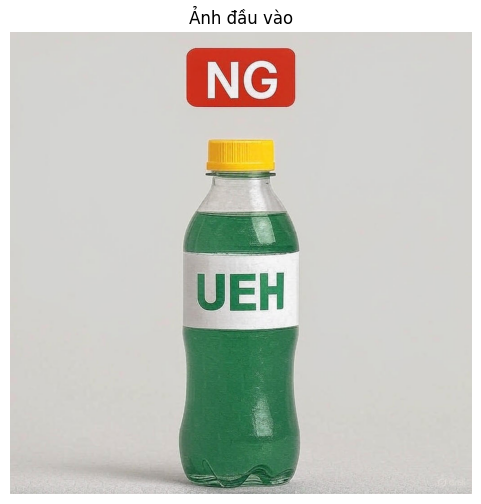

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 735ms/step

üéØ K·∫øt qu·∫£ ph√¢n lo·∫°i:
‚úîÔ∏è Nh√£n d·ª± ƒëo√°n: Kh√¥ng ƒë·∫°t y√™u c·∫ßu
üî¢ X√°c su·∫•t d·ª± ƒëo√°n: [0.49280038]

‚ùå S·∫£n ph·∫©m kh√¥ng ƒë·∫°t y√™u c·∫ßu do: **L·ªñI NH√ÉN D√ÅN**
‚ö†Ô∏è ƒê·ªô tin c·∫≠y th·∫•p: 0.4928


In [30]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import os
import random

# T·∫Øt OneDNN ƒë·ªÉ t∆∞∆°ng th√≠ch CPU (n·∫øu c·∫ßn)
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

# ƒê∆∞·ªùng d·∫´n ·∫£nh
image_path = r"/content/drive/MyDrive/image (3).jpg"

# ƒê·ªçc ·∫£nh
img = cv2.imread(image_path)

if img is None:
    print("Kh√¥ng th·ªÉ ƒë·ªçc h√¨nh ·∫£nh. Ki·ªÉm tra l·∫°i ƒë∆∞·ªùng d·∫´n:", image_path)
else:
    # Hi·ªÉn th·ªã ·∫£nh ƒë·∫ßu v√†o
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('·∫¢nh ƒë·∫ßu v√†o')
    plt.axis('off')
    plt.show()

    # Ti·ªÅn x·ª≠ l√Ω ƒë√∫ng chu·∫©n MobileNetV2
    img_resized = cv2.resize(img, (224, 224))
    img_resized = img_resized.astype('float32') / 255.0
    img_resized = np.expand_dims(img_resized, axis=0)

    # Load m√¥ h√¨nh ƒë√£ hu·∫•n luy·ªán
    model = load_model("bai3.h5")

    # D·ª± ƒëo√°n
    prediction = model.predict(img_resized)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)
    class_labels = ['Kh√¥ng ƒë·∫°t y√™u c·∫ßu', 'ƒê·∫°t y√™u c·∫ßu']

    # Ph√¢n lo·∫°i theo ng∆∞·ª°ng tin c·∫≠y
    if confidence >= 0.5:
        label = class_labels[1]  # ƒê·∫°t y√™u c·∫ßu
    else:
        label = class_labels[0]  # Kh√¥ng ƒë·∫°t y√™u c·∫ßu

    # Hi·ªÉn th·ªã k·∫øt qu·∫£ ch√≠nh
    print("\nüéØ K·∫øt qu·∫£ ph√¢n lo·∫°i:")
    print(f"‚úîÔ∏è Nh√£n d·ª± ƒëo√°n: {label}")
    print(f"üî¢ X√°c su·∫•t d·ª± ƒëo√°n: {prediction[0]}")

    # N·∫øu kh√¥ng ƒë·∫°t, gi·∫£ l·∫≠p l·ªói c·ª• th·ªÉ
    if label == "Kh√¥ng ƒë·∫°t y√™u c·∫ßu":
        # Gi·∫£ l·∫≠p l√Ω do l·ªói
        error_reasons = ["sai m√†u s·∫Øc", "l·ªói nh√£n d√°n"]
        reason = random.choice(error_reasons)

        print(f"\n‚ùå S·∫£n ph·∫©m kh√¥ng ƒë·∫°t y√™u c·∫ßu do: **{reason.upper()}**")
        if confidence < 0.5:
            print(f"‚ö†Ô∏è ƒê·ªô tin c·∫≠y th·∫•p: {confidence:.4f}")


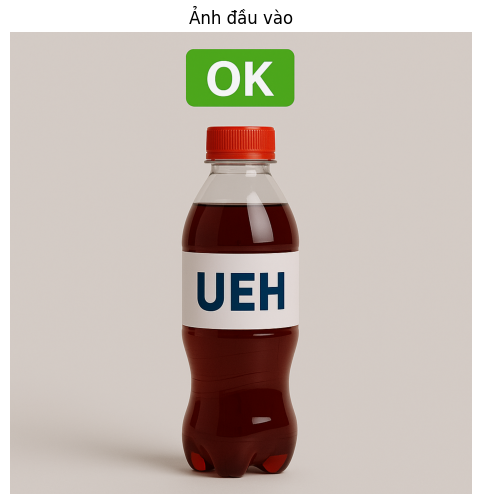

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 1s/step

üéØ K·∫øt qu·∫£ ph√¢n lo·∫°i:
‚úîÔ∏è Nh√£n d·ª± ƒëo√°n: ƒê·∫°t y√™u c·∫ßu
üî¢ X√°c su·∫•t d·ª± ƒëo√°n: [0.5059698]


In [29]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import os
import random

# T·∫Øt OneDNN ƒë·ªÉ t∆∞∆°ng th√≠ch CPU (n·∫øu c·∫ßn)
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

# ƒê∆∞·ªùng d·∫´n ·∫£nh
image_path = r"/content/drive/MyDrive/ChatGPT Image 20_43_26 1 thg 5, 2025.png"

# ƒê·ªçc ·∫£nh
img = cv2.imread(image_path)

if img is None:
    print("Kh√¥ng th·ªÉ ƒë·ªçc h√¨nh ·∫£nh. Ki·ªÉm tra l·∫°i ƒë∆∞·ªùng d·∫´n:", image_path)
else:
    # Hi·ªÉn th·ªã ·∫£nh ƒë·∫ßu v√†o
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('·∫¢nh ƒë·∫ßu v√†o')
    plt.axis('off')
    plt.show()

    # Ti·ªÅn x·ª≠ l√Ω ƒë√∫ng chu·∫©n MobileNetV2
    img_resized = cv2.resize(img, (224, 224))
    img_resized = img_resized.astype('float32') / 255.0
    img_resized = np.expand_dims(img_resized, axis=0)

    # Load m√¥ h√¨nh ƒë√£ hu·∫•n luy·ªán
    model = load_model("bai3.h5")

    # D·ª± ƒëo√°n
    prediction = model.predict(img_resized)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)
    class_labels = ['Kh√¥ng ƒë·∫°t y√™u c·∫ßu', 'ƒê·∫°t y√™u c·∫ßu']

    # Ph√¢n lo·∫°i theo ng∆∞·ª°ng tin c·∫≠y
    if confidence >= 0.5:
        label = class_labels[1]  # ƒê·∫°t y√™u c·∫ßu
    else:
        label = class_labels[0]  # Kh√¥ng ƒë·∫°t y√™u c·∫ßu

    # Hi·ªÉn th·ªã k·∫øt qu·∫£ ch√≠nh
    print("\nüéØ K·∫øt qu·∫£ ph√¢n lo·∫°i:")
    print(f"‚úîÔ∏è Nh√£n d·ª± ƒëo√°n: {label}")
    print(f"üî¢ X√°c su·∫•t d·ª± ƒëo√°n: {prediction[0]}")

    # N·∫øu kh√¥ng ƒë·∫°t, gi·∫£ l·∫≠p l·ªói c·ª• th·ªÉ
    if label == "Kh√¥ng ƒë·∫°t y√™u c·∫ßu":
        # Gi·∫£ l·∫≠p l√Ω do l·ªói
        error_reasons = ["sai m√†u s·∫Øc", "l·ªói nh√£n d√°n"]
        reason = random.choice(error_reasons)

        print(f"\n‚ùå S·∫£n ph·∫©m kh√¥ng ƒë·∫°t y√™u c·∫ßu do: **{reason.upper()}**")
        if confidence < 0.5:
            print(f"‚ö†Ô∏è ƒê·ªô tin c·∫≠y th·∫•p: {confidence:.4f}")
